***Simple linear regression***

In [3]:
# s-1 importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


In [4]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [5]:
# s-2 Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [6]:
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

 # Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [7]:
# s-3 create a linear regression model
model=LinearRegression()

In [8]:
# s-4   the model using dataset
model.fit(X,Y)

LinearRegression()

In [9]:
# s-5 get the values of slope(m) and intercept(c) from
c=model.coef_[0]
i=model.intercept_
print("coefficient",model.coef_[0])
print("intercept",model.intercept_)


coefficient 4.965498141580591
intercept 27.430065779800536


In [ ]:
# s-6 display the line equation
print(f"equation of the line :Y ={c:.2f}X +{i:.2f}")

In [25]:
# s-7 predict values using the  model
Y_pred=model.predict(X)

**Model Evaluation Metricx**

In [33]:
#1.mean square error 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 11.75


In [34]:
#2.mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error (Mae):{mae:.2f}")

Mean Absolute Error (Mae):2.87


In [35]:
# 3.root mean square error
rmse=np.sqrt(mse)
print(f"root mean square error (Rmse):{rmse:.2f}")

root mean square error (Rmse):3.43


In [39]:
from sklearn.metrics import r2_score

# Assuming Y and Y_pred are your actual and predicted values
r2 = r2_score(Y, Y_pred)
print(f"R-Squared (R^2): {r2:.2f}")


R-Squared (R^2): 0.95


In [45]:
# 5 Adjust R-Squared 

n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted r-Square :{adj_r2:.2f}")

Adjusted r-Square :0.94


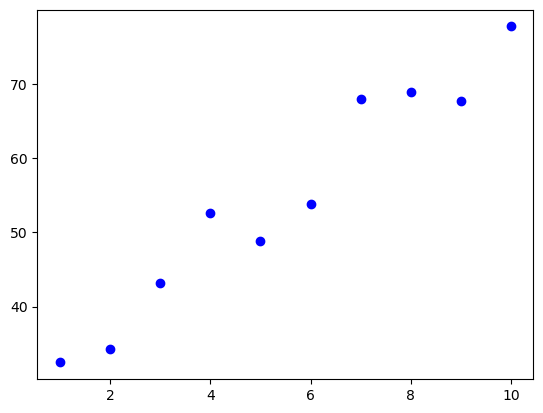

In [46]:
plt.scatter(X,Y,color="blue",label="Actual Data")

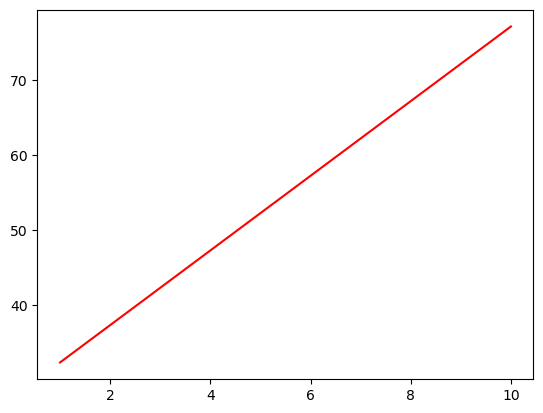

In [47]:
plt.plot(X,Y_pred,color='red',label="Best Fit Line")

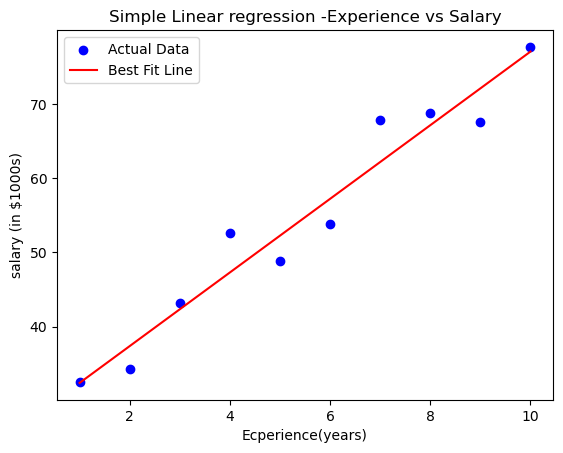

In [48]:
plt.scatter(X,Y,color="blue",label="Actual Data")
plt.plot(X,Y_pred,color='red',label="Best Fit Line")
plt.xlabel('Ecperience(years)')
plt.ylabel('salary (in $1000s)')
plt.title("Simple Linear regression -Experience vs Salary")
plt.legend()
plt.show()

**Prediction Model**


In [ ]:
while True:
    try:
        exp=float(input("\n Enter the years of experience to predict th4 salary(or -1 to exit)"))
        if exp==1:
            break
        predict_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience :${predict_salary}")
    except ValueError:
        print("please enter a valid number!")
               

In [10]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:11:37   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
